In [1]:
#펭수/워크맨 csv 불러와서 시각화 및 머신러닝
# 패키지 import
import datetime as dt
import pandas as pd   #df 분석용
import requests
import time
import urllib.request #
import re     
import konlpy

from bs4 import BeautifulSoup
from pandas import DataFrame
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from nltk import FreqDist

In [14]:
# 시각화  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image             #워드클라우드용
from wordcloud import WordCloud   #워드클라우드용
fpath = "NotoSansCJKkr-Bold.otf"   #워드클라우드 국문지원을 위한 별도 폰트 path 설정
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
############### Read #################
peng_intro = pd.read_csv('peng_intro.csv')  # 펭수의 intro DF 
work_intro = pd.read_csv('work_intro.csv')  # 워크맨의 intro DF 

peng = pd.read_csv('peng.csv')               #펭수의 동영상list DF
peng_reply = pd.read_csv('peng_reply.csv')   #펭수의 동영상별 댓글list DF

work = pd.read_csv('work.csv')               #워크맨의 동영상list DF
work_reply = pd.read_csv('work_reply.csv')   #워크맨의 동영상별 댓글list DF

############# 구분자 추가 ################
for i in range(len(peng)): peng['구분'] = '펭수' 
for i in range(len(work)): work['구분'] = '워크맨'
for i in range(len(peng_reply)): peng_reply['구분'] = '펭수'    
for i in range(len(work_reply)): work_reply['구분'] = '워크맨'
    
############## DF 통합 ##################
# 1) 펭수 + 워크맨 intro DF 통합
intro_paw = pd.DataFrame(peng_intro)       
intro_paw = intro_paw.append(work_intro)

# 2) 펭수 + 워크맨 동영상list DF 통합
paw = pd.DataFrame(peng)     
paw = paw.append(work)

# 3) 펭수 + 워크맨 동영상별 댓글list DF 통합
paw_reply = pd.DataFrame(peng_reply)  
paw_reply = paw_reply.append(work_reply)    


In [16]:
intro_paw.head()

,Unnamed: 0,구분,구독자,영상수
0,1,펭수,135만명,133
0,2,워크맨,353만명,35


In [17]:
paw = paw.astype({'좋아요': int})
paw.head()  #  통합한 동영상list DF 확인

,Unnamed: 0,제목,주소,조회수,좋아요,싫어요,댓글수,본문내용,구분
0,0,[Ep 67] 전 세계 게 섰거라 (feat. 외교부),/watch?v=yUJAvW2Rykc,"1,381,698",42000,749,"6,838",K-펭귄 한다 해외진출,펭수
1,1,[Ep.66] 화보 모델 펭수,/watch?v=XUM3sH1kBtw,"1,583,971",46000,455,"7,678",펭수가 화보 모델로서 촬영을 하게 되었다!화보 촬영을 위한 펭수의 눈물(?) 나는 ...,펭수
2,2,펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡),/watch?v=LPmyxMH96S8,"604,376",29000,135,"3,921",힙합펭수의 커버영상이 드. 디. 어. 찾아왔다!월미도에서 촬영했던 미공개 영상과 여...,펭수
3,3,[Ep.65] 세상에 나쁜 펭귄은 없다.,/watch?v=wedLGh2jxkQ,"1,975,593",50000,548,"6,974",어느 날 갑자기 펭수에게 이상한 행동들이 보인다!? 걱정된 제작진들이 긴급 솔루션 ...,펭수
4,4,수험생은 지금 당장 이 영상을 봅니다 (feat. 정승제쌤),/watch?v=25RhzK3HuYM,"651,078",20000,135,"2,760",내일 모레 엄청 큰 시험을 앞둔여러분들을 위해 이 영상을 바칩니당 펭펭,펭수


In [18]:
paw_reply.describe()  # 통합한 동영상별 댓글list DF 확인

,Unnamed: 0,Like,Title_number
count,3160.000000,3160.000000,3160.0
mean,9.500000,1430.986392,0.0
std,5.767194,2652.356452,0.0
min,0.000000,0.000000,0.0
25%,4.750000,193.000000,0.0
50%,9.500000,546.500000,0.0
75%,14.250000,1500.000000,0.0
max,19.000000,38000.000000,0.0


In [19]:
paw.describe()

,Unnamed: 0,좋아요,싫어요
count,158.000000,158.000000,158.000000
mean,51.253165,29989.873418,467.550633
std,36.693070,32530.949869,685.085234
min,0.000000,2400.000000,8.000000
25%,19.250000,9925.000000,69.250000
50%,43.500000,17500.000000,163.500000
75%,82.750000,35750.000000,464.750000
max,122.000000,180000.000000,3600.000000


In [20]:
intro_paw.describe()

,Unnamed: 0,영상수
count,2.000000,2.000000
mean,1.500000,84.000000
std,0.707107,69.296465
min,1.000000,35.000000
25%,1.250000,59.500000
50%,1.500000,84.000000
75%,1.750000,108.500000
max,2.000000,133.000000


,구분,좋아요
0,워크맨,79628.571429
1,펭수,15865.040650


c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49704 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49492 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47805 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44415 missing from current font.
  font.set_text(s

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 57096 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49916 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44192 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51460 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47129 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52237 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51080 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 57270 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53748 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54504 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47803 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54392 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47566 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51276 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52828 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44873 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50880 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46993 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48727 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49399 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12622 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48729 missing from current font.
  font.set_text(s, 0, fla

c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46304 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54648 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\guswl\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47148 missing from current font.
  font.set_text(s, 0, flags=flags)


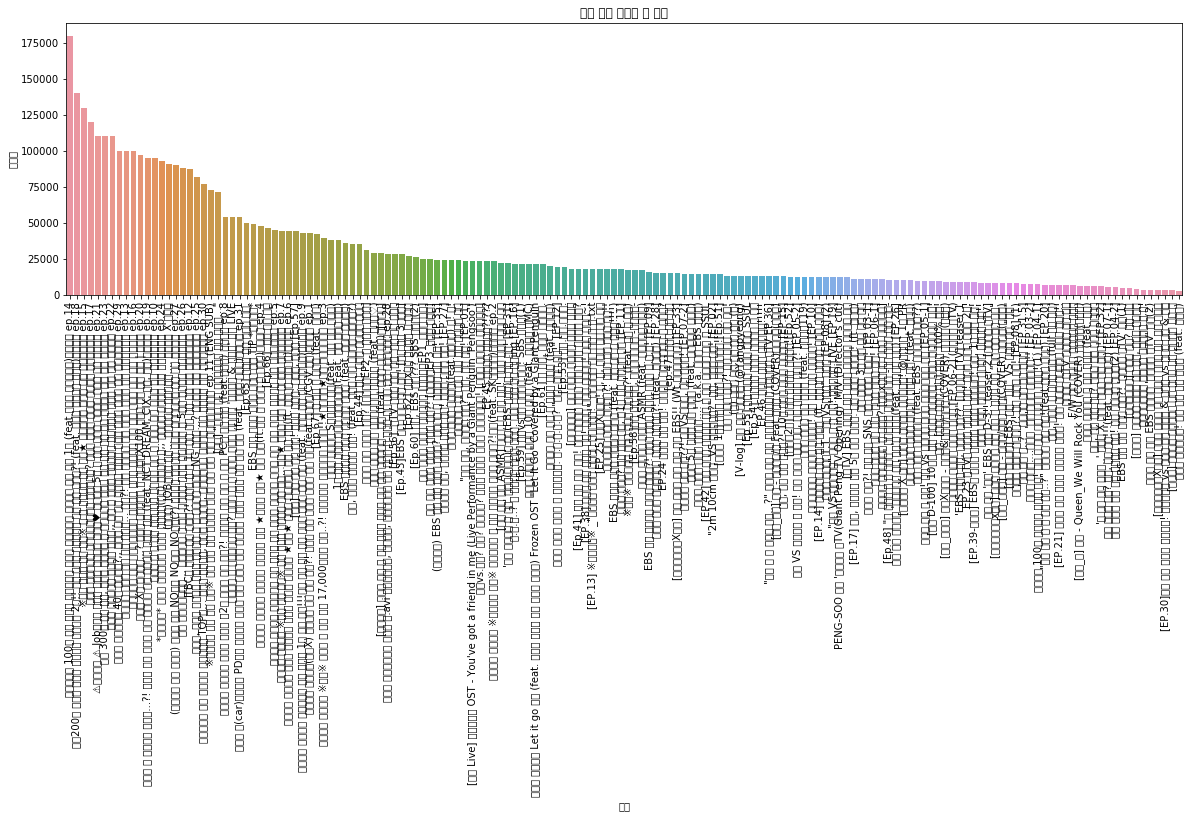

In [21]:
#시각화
fig = plt.figure(figsize=(20,5))
plt.title('가장 많은 좋아요 순 정렬')
sns.barplot(x='제목', y='좋아요', data=paw[['제목', '좋아요']].groupby('제목', as_index=False).mean().sort_values(by='좋아요', ascending=False));
plt.xticks(rotation=90); #x축(country) 회전

# 구분에 따른 요약
paw[['좋아요','구분']].groupby('구분', as_index=False).mean().sort_values(by='좋아요', ascending=False).head()

In [22]:
############ UNLIKE RATIO 구하기 ############  
# 워킹맨 구독자 수가(353만명) 펭수(134만명)의 3배이상으로, 
# 비율을 구해 서로의 값을 확인 예정

unlike_ratio_list = []
for i in range(len(paw)): 
    unlike_ratio = (paw.iloc[i, 5] / paw.iloc[i,4]) * 100  # 퍼센테이지 표현
    unlike_ratio_ar= round(unlike_ratio,2)                 # 소숫점 2자리까지 표현 
    unlike_ratio_list.append(unlike_ratio_ar)          

paw['unlike_ratio(%)'] = unlike_ratio_list                 # ratio 열 생성

In [23]:
paw.head() 

,Unnamed: 0,제목,주소,조회수,좋아요,싫어요,댓글수,본문내용,구분,unlike_ratio(%)
0,0,[Ep 67] 전 세계 게 섰거라 (feat. 외교부),/watch?v=yUJAvW2Rykc,"1,381,698",42000,749,"6,838",K-펭귄 한다 해외진출,펭수,1.78
1,1,[Ep.66] 화보 모델 펭수,/watch?v=XUM3sH1kBtw,"1,583,971",46000,455,"7,678",펭수가 화보 모델로서 촬영을 하게 되었다!화보 촬영을 위한 펭수의 눈물(?) 나는 ...,펭수,0.99
2,2,펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡),/watch?v=LPmyxMH96S8,"604,376",29000,135,"3,921",힙합펭수의 커버영상이 드. 디. 어. 찾아왔다!월미도에서 촬영했던 미공개 영상과 여...,펭수,0.47
3,3,[Ep.65] 세상에 나쁜 펭귄은 없다.,/watch?v=wedLGh2jxkQ,"1,975,593",50000,548,"6,974",어느 날 갑자기 펭수에게 이상한 행동들이 보인다!? 걱정된 제작진들이 긴급 솔루션 ...,펭수,1.10
4,4,수험생은 지금 당장 이 영상을 봅니다 (feat. 정승제쌤),/watch?v=25RhzK3HuYM,"651,078",20000,135,"2,760",내일 모레 엄청 큰 시험을 앞둔여러분들을 위해 이 영상을 바칩니당 펭펭,펭수,0.68


,구분,unlike_ratio(%)
0,워크맨,1.901143
1,펭수,1.007561


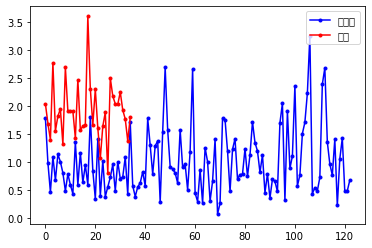

In [24]:
# unlike에 따른 정렬 및 시각화
peng_list=[]  # 현재 df가 통합되어, 색상 분리를 위해 다시 분리
work_list=[]

for i in range(len(paw)):        
    if (paw.iloc[i,8]) =='펭수':   # '구분'이 펭수일 경우
        peng=paw.iloc[i,9]         # 펭수의 ratio를 peng_list에 삽입
        peng_list.append(peng)
    else:
        work=paw.iloc[i,9]         # '구분'이 워크맨일 경우 
        work_list.append(work)     # 워크맨의 ratio를 work_list에 삽입

plt.plot(peng_list, marker='.', color='b')   # 펭수: blue
plt.plot(work_list, marker='.', color='r')   # 워크맨: red
plt.legend(['워크맨', '펭수'], loc='upper right')

# 구분에 따른 요약
paw[['unlike_ratio(%)','구분']].groupby('구분', as_index=False).mean().sort_values(by='unlike_ratio(%)',
                                                                               ascending=False).head()

In [25]:
# 워드 클라우드 설정
title_l2s=(''.join(paw["제목"])) # paw의 제목df를 string으로

image_test=np.array(Image.open("ytbb.png")) #mask 이미지 설정
wc = WordCloud(max_font_size=200,font_path=fpath,background_color='#FFFFFF',
               width=1200,height=800,mask=image_test).generate(title_l2s)

#사이즈 등 설정
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')

FileNotFoundError: [Errno 2] No such file or directory: 'ytbb.png'

In [26]:
total_cnt = len(paw_reply['ID'])
cnt_1percent= total_cnt*0.01
print("* 전체 댓글 개수:", len(paw_reply['ID']), ", 전체 댓글의 1% 개수:", cnt_1percent)
print("/////////////////////////////////////////////////////////////////////////////")
print("* 상위 10% User ID 빈도수 확인(count):")
print(paw_reply['ID'].value_counts(ascending=False)[:31]) # 빈도수 기준 내림차순

print("/////////////////////////////////////////////////////////////////////////////")
print("* 상위 10% User 빈도수 확인(ratio):")
print(paw_reply['ID'].value_counts(normalize=True)[:31])  # 비율 기준 출력

* 전체 댓글 개수: 3160 , 전체 댓글의 1% 개수: 31.6
/////////////////////////////////////////////////////////////////////////////
* 상위 10% User ID 빈도수 확인(count):
 자이언트 펭TV                         40
 워크맨-Workman                      34
 나눈누                              16
 Jeje                             15
 고잉메리쓰                            11
 펭랑단1호                            10
 펭수쳐돌이                             9
 펭펭                                8
 SAJOgroup                         7
 오석현                               7
 콩절미                               6
 9 cw                              6
 JE Choi                           6
 ᄋᄋ                                6
 지금이순간                             6
 민트마카롱                             5
 polarin                           5
 오하라                               5
 인사처TV                             5
 공인회계사50th                         5
 The great Peng                    5
 Amber Rodriguez                   5
 김명중                               5
 

In [27]:
# csv 파일의 columnms 확인
paw.columns
paw_reply.columns

Index(['Unnamed: 0', 'ID', 'Comment', 'Like', 'Title_number', '구분'], dtype='object')

In [28]:
# csv 파일에서 필요한 column만 리스트로 저장
paw_title_list = paw.제목.tolist()
paw_content_list = paw.본문내용.tolist()
paw_reply_list = paw_reply.Comment.tolist()

In [29]:
# 리스트 출력하여 확인
print(paw_title_list[:3])  #부하로 인해 테스트로 3개만 출력

['[Ep 67] 전 세계 게 섰거라 (feat. 외교부)', '[Ep.66]  화보 모델 펭수', '펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡)']


In [30]:
# 형태소 분석
from konlpy.tag import Okt
okt=Okt()

In [31]:
# 제목 리스트 명사 분석
title_list=[]
for i in range(len(paw_title_list)):
    title_list.append(okt.nouns(paw_title_list[i]))
    
# 본문 내용 명사 분석
content_list=[]
for i in range(len(paw_content_list)):
    content_list.append(okt.nouns(paw_content_list[i]))

# 댓글 내용 명사 분석
reply_list=[]
for i in range(len(paw_reply_list)):
    reply_list.append(okt.nouns(paw_reply_list[i]))

In [32]:
# 리스트 안의 리스트 하나의 리스트로 만들기
def flatten (n):
    org =[]
    for i in n :
        if (isinstance(i,list)):
            org += flatten(i)
        else:
            org.append(i)
    return org

In [33]:
flatten(title_list) # 실행되는지 확인

['전',
 '세계',
 '게',
 '외교부',
 '화보',
 '모델',
 '펭수',
 '펭수',
 '팬',
 '최강',
 '컬래버레이션',
 '신상',
 '뮤비',
 '린지',
 '세상',
 '펭귄',
 '수험생',
 '지금',
 '당장',
 '이',
 '영상',
 '정승',
 '쌤',
 '남극',
 '유치원',
 '동창회',
 '시작',
 '둘리',
 '선배',
 '등장',
 '윤도현',
 '선배',
 '본부',
 '만남',
 '우리',
 '호흡',
 '난리',
 '남',
 '펭수',
 '매니저',
 '사관학교',
 '매니저',
 '스',
 '펭',
 '인간',
 '펭귄',
 '첫',
 '데이트',
 '펭수',
 '실버',
 '버튼',
 '날개',
 '언박싱',
 '처음',
 '나',
 '펭수',
 '학교',
 '잠입',
 '공',
 '행운',
 '펭수',
 '카드',
 '탄생',
 '비화',
 '개',
 '펭수',
 '퇴사',
 '정복기',
 '이제야',
 '공개',
 '추억',
 '라이브',
 '진행',
 '펭',
 '펭수',
 '관심사',
 '대결',
 '정복기',
 '친구',
 '간다',
 '펭수',
 '비밀',
 '펭귄',
 '극장',
 '스타',
 '외로워',
 '한류',
 '펭귄',
 '펭수',
 '해외진출',
 '프랑스',
 '편',
 '추억',
 '독자',
 '축하',
 '라이브',
 '트렌치코트',
 '언박싱',
 '단독',
 '펭귄',
 '의혹',
 '전격',
 '해부',
 '독점',
 '인터뷰',
 '김민교',
 '양치',
 '승',
 '펭수',
 '진짜',
 '나이',
 '살',
 '펭귄',
 '극장',
 '내',
 '나이',
 '자이언트',
 '펭',
 '방송',
 '시간',
 '변경',
 '안내',
 '펭',
 '야유회',
 '지옥',
 '신상',
 '타이틀곡',
 '뮤직비디오',
 '린지',
 '교감',
 '선생님',
 '풀',
 '펭수',
 '갑자기',
 '뱀',
 '우리',
 '펭수',
 '눈물',
 '펭귄',
 '극장',


In [34]:
# 제목, 본문 내용, 댓글 내용 하나의 리스트로 취합
title_f = flatten(title_list)
content_f = flatten(content_list)
reply_f = flatten(reply_list)

In [35]:
# 단어 빈도수 확인을 위한 패키지 import
from nltk.book import *
import operator
from nltk.corpus import brown
from nltk.corpus import stopwords

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [36]:
# 제목 빈도수 확인
fdist1 = FreqDist(title_f)
title_dict = {}
content_dict = {}
reply_dict = {}

dict_w = {}
for w in title_f:
    dict_w[w] = fdist1[w]
title_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(title_dict)

[('펭수', 87), ('워크맨', 38), ('펭귄', 30), ('리뷰', 29), ('알바', 28), ('펭', 13), ('채널', 12), ('공개', 11), ('독립', 10), ('매니저', 9), ('연습생', 9), ('세상', 8), ('자이언트', 8), ('장성규', 8), ('라이브', 7), ('독자', 7), ('눈물', 7), ('역대', 7), ('최초', 7), ('선배', 5), ('직캠', 5), ('투표', 5), ('게임', 5), ('인', 5), ('것', 5), ('데뷔', 5), ('민속촌', 5), ('언박싱', 4), ('대결', 4), ('편', 4), ('방송', 4), ('마감', 4), ('선공', 4), ('현장', 4), ('도전', 4), ('거대', 4), ('이말년', 4), ('고양예고', 4), ('기념', 4), ('관종', 4), ('남매', 4), ('폭발', 4), ('세계', 3), ('린지', 3), ('영상', 3), ('남극', 3), ('등장', 3), ('우리', 3), ('남', 3), ('첫', 3), ('학교', 3), ('극장', 3), ('스타', 3), ('진짜', 3), ('펭수쇼', 3), ('안', 3), ('힐링', 3), ('선물', 3), ('본격', 3), ('알', 3), ('의', 3), ('수능', 3), ('이야기', 3), ('말', 3), ('피지', 3), ('컬', 3), ('갤러리', 3), ('빡빡이', 3), ('아저씨', 3), ('굿', 3), ('선', 3), ('대회', 3), ('전지영', 3), ('은밀', 3), ('명', 3), ('돌파', 3), ('댓글', 3), ('두', 3), ('주의', 3), ('일', 3), ('홍대', 3), ('뽀로로', 3), ('인생', 3), ('먹방', 3), ('배달', 3), ('시급', 3), ('사장', 3), ('드립', 3), ('끝판', 3), ('꿀', 3)

In [37]:
# 본문 내용 빈도수 확인
fdist1 = FreqDist(content_f)
dict_w = {}
for w in content_f:
    dict_w[w] = fdist1[w]
content_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(content_dict)

[('펭수', 130), ('리뷰', 74), ('알바', 69), ('장성규', 60), ('워크맨', 47), ('직업', 37), ('스튜디오', 34), ('펭', 28), ('펭귄', 25), ('인력', 23), ('것', 20), ('영상', 19), ('독자', 18), ('자이언트', 18), ('매니저', 16), ('소장', 16), ('잡것', 16), ('공개', 14), ('수', 14), ('친구', 13), ('여러분', 12), ('연습생', 12), ('나', 11), ('우리', 11), ('위해', 10), ('선배', 10), ('덜', 10), ('위', 9), ('이번', 9), ('이', 9), ('남극', 9), ('더', 9), ('편', 9), ('세상', 7), ('거', 7), ('꿀팁', 7), ('앞', 7), ('크리에이터', 7), ('뽀로로', 7), ('시간', 6), ('하나', 6), ('방', 6), ('게', 6), ('내', 6), ('준비', 6), ('말', 6), ('지금', 6), ('눈', 6), ('게임', 6), ('사람', 6), ('방송', 6), ('팬', 6), ('체험', 6), ('스승', 6), ('채널', 6), ('에버랜드', 6), ('눈물', 5), ('펭펭', 5), ('워', 5), ('오', 5), ('과연', 5), ('이유', 5), ('시작', 5), ('풀', 5), ('인', 5), ('알', 5), ('라이브', 5), ('도전', 5), ('만', 5), ('명', 5), ('안', 5), ('첫', 5), ('배달', 5), ('데뷔', 5), ('실화', 5), ('남매', 5), ('알바생', 5), ('술집', 5), ('촬영', 4), ('직접', 4), ('힙합', 4), ('린지', 4), ('참여', 4), ('날', 4), ('갑자기', 4), ('진', 4), ('가지', 4), ('기', 4), ('셀럽', 4), ('한

In [39]:
# 댓글 내용 빈도수 확인
fdist1 = FreqDist(reply_f)
dict_w = {}
for w in reply_f:
    dict_w[w] = fdist1[w]
reply_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(reply_dict)

[('펭수', 1659), ('진짜', 360), ('거', 236), ('때', 227), ('것', 212), ('펭', 207), ('이', 207), ('우리', 203), ('사람', 189), ('나', 182), ('왜', 172), ('내', 158), ('영상', 155), ('너', 151), ('펭귄', 142), ('워크맨', 142), ('말', 139), ('저', 119), ('목소리', 119), ('더', 115), ('생각', 109), ('매니저', 107), ('그', 105), ('보고', 104), ('댓글', 96), ('수', 91), ('살', 86), ('친구', 86), ('장성규', 86), ('좀', 85), ('안', 84), ('뭐', 83), ('어른', 80), ('개', 80), ('어린이', 80), ('애', 78), ('일', 78), ('알바', 77), ('분', 73), ('지금', 73), ('정말', 73), ('사랑', 71), ('알', 70), ('사장', 69), ('모든', 64), ('난', 61), ('하나', 60), ('게', 59), ('때문', 58), ('또', 57), ('걸', 55), ('이제', 55), ('굿', 54), ('애기', 54), ('노래', 54), ('제', 53), ('마음', 53), ('아이', 52), ('세상', 52), ('김명중', 52), ('편집', 51), ('진', 51), ('시간', 51), ('소리', 51), ('여기', 49), ('인력', 49), ('방송', 48), ('뽀로로', 48), ('중', 47), ('그냥', 47), ('해', 46), ('전', 46), ('한번', 46), ('제일', 45), ('못', 44), ('편', 44), ('리뷰', 44), ('팬', 43), ('직원', 43), ('남극', 43), ('선생님', 43), ('앞', 42), ('요즘', 42), ('독자', 

In [40]:
# 빈도수를 데이터프레임 형태로 저장
title_df = DataFrame(title_dict)
content_df = DataFrame(content_dict)
reply_df = DataFrame(reply_dict)

In [41]:
title_df.head() # 데이터 확인

,0,1
0,펭수,87
1,워크맨,38
2,펭귄,30
3,리뷰,29
4,알바,28


In [40]:
#######################################
### NMF
content_df.head()

NameError: name 'content_df' is not defined